In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Test.csv
/kaggle/input/Train.csv


# Importing DataSets

In [2]:
df_train= pd.read_csv('/kaggle/input/Train.csv')
df_test=pd.read_csv('/kaggle/input/Test.csv')

In [3]:
df_train.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

# EDA

In [4]:
df_train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [6]:
df_test.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,...,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,...,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,...,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,...,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,...,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                3000 non-null   object 
 1   Gender                     3000 non-null   object 
 2   Age                        2839 non-null   float64
 3   Education_Level            3000 non-null   int64  
 4   Relationship_Status        3000 non-null   object 
 5   Hometown                   3000 non-null   object 
 6   Unit                       3000 non-null   object 
 7   Decision_skill_possess     3000 non-null   object 
 8   Time_of_service            2948 non-null   float64
 9   Time_since_promotion       3000 non-null   int64  
 10  growth_rate                3000 non-null   int64  
 11  Travel_Rate                3000 non-null   int64  
 12  Post_Level                 3000 non-null   int64  
 13  Pay_Scale                  2997 non-null   float

In [8]:
#Searching for missing values and then analysing
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Missing values

In [9]:
features_with_na= [features for features in df_train.columns if df_train[features].isnull().sum()>1]
features_with_na_test= [features for features in df_test.columns if df_test[features].isnull().sum()>1]

for feature in features_with_na:
    print( feature, np.round(df_train[feature].isnull().mean(),4),'% missing values')

Age 0.0589 % missing values
Time_of_service 0.0206 % missing values
Pay_Scale 0.0013 % missing values
Work_Life_balance 0.0016 % missing values
VAR2 0.0824 % missing values
VAR4 0.0937 % missing values


Numeric values

In [10]:
features_with_num= [feature for feature in df_train.columns if df_train[feature].dtypes!='O']
print(features_with_num)

['Age', 'Education_Level', 'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'Attrition_rate']


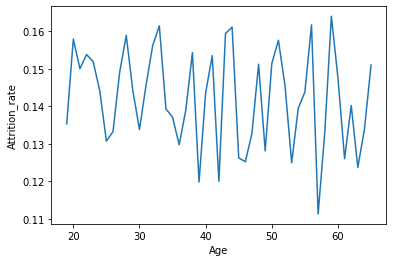

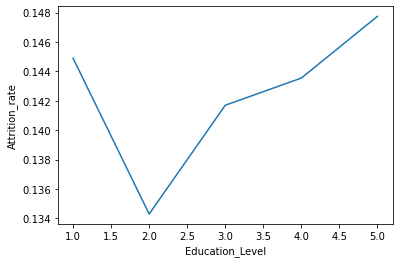

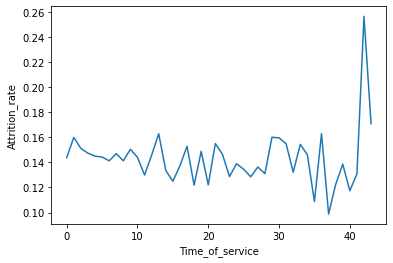

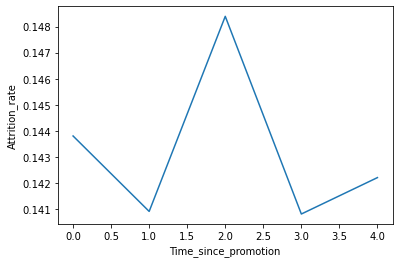

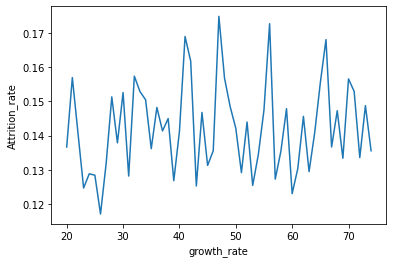

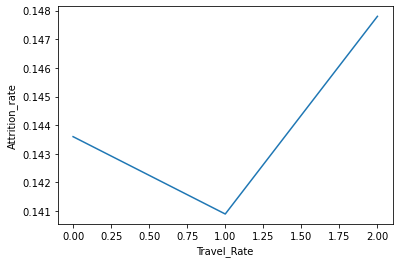

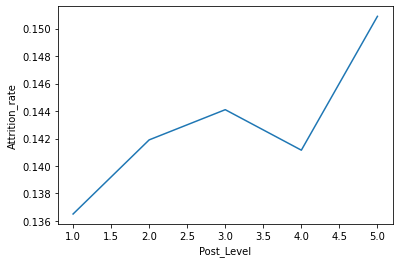

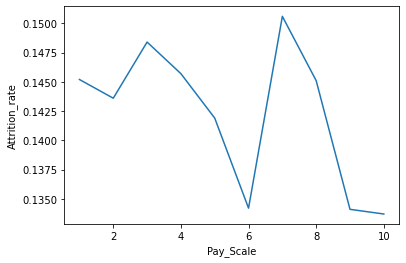

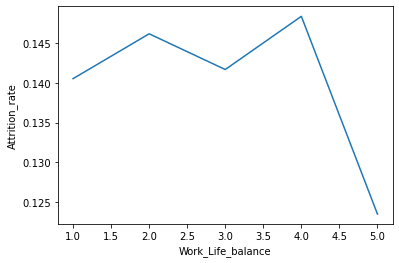

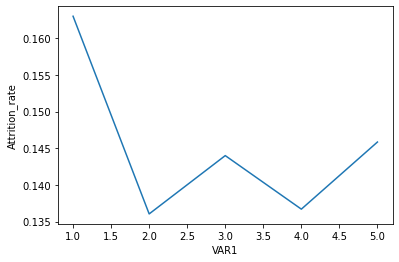

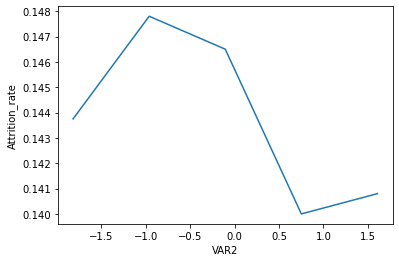

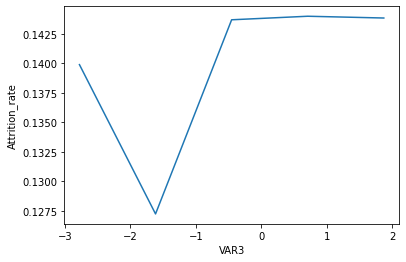

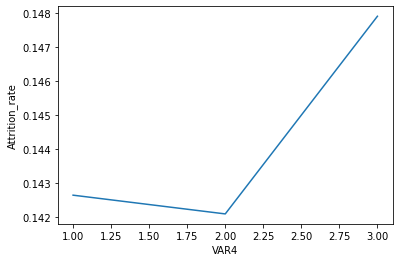

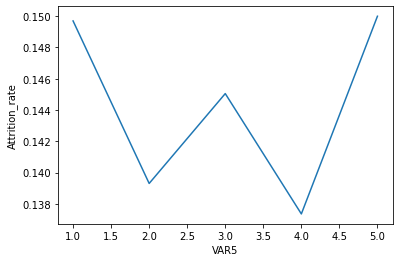

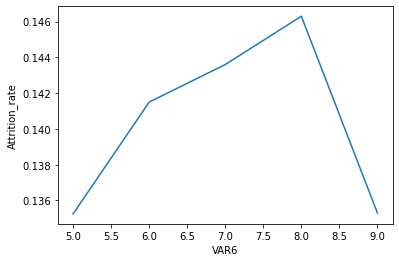

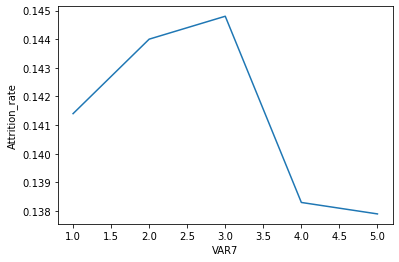

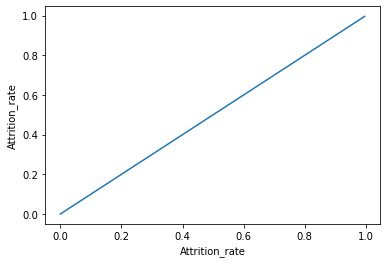

In [11]:
for feature in features_with_num:
    df_train.groupby(feature)['Attrition_rate'].median().plot()
    plt.xlabel(feature)
    plt.ylabel("Attrition_rate")
  
    plt.show()


Discrete Var

In [12]:
discrete_feature=[feature for feature in features_with_num and df_train if len(df_train[feature].unique())<10 or df_train[feature].dtypes=='O']
discrete_feature.remove('Hometown')
discrete_feature.remove('Employee_ID')
print(discrete_feature)

['Gender', 'Education_Level', 'Relationship_Status', 'Unit', 'Decision_skill_possess', 'Time_since_promotion', 'Travel_Rate', 'Post_Level', 'Compensation_and_Benefits', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7']


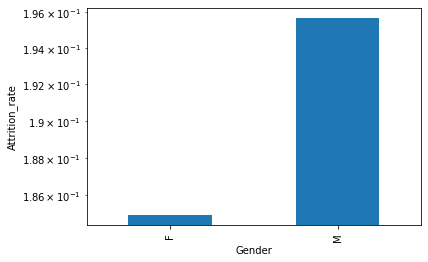

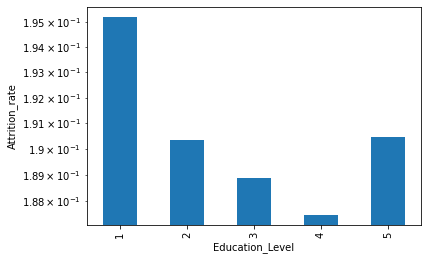

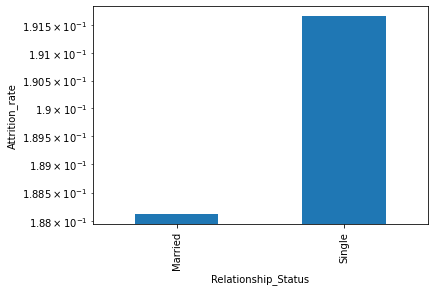

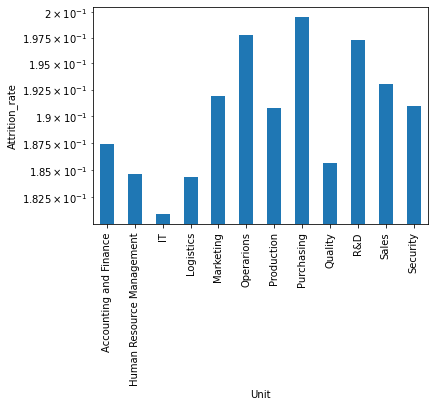

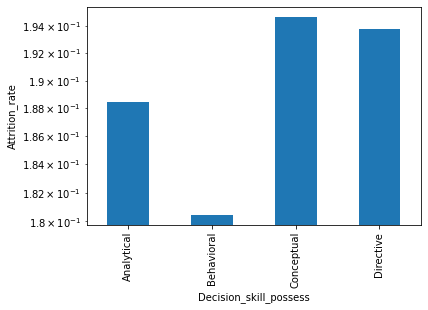

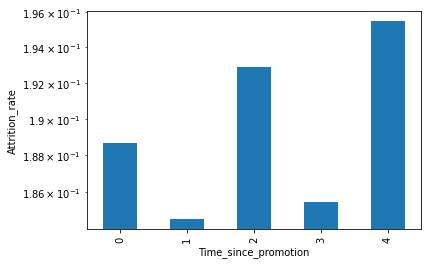

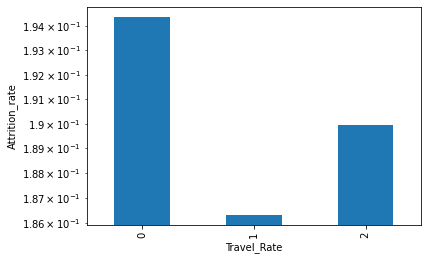

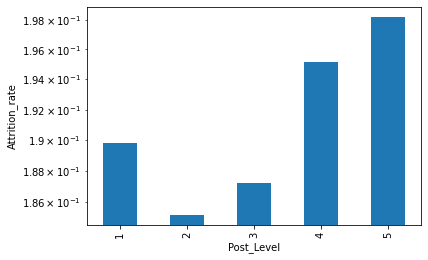

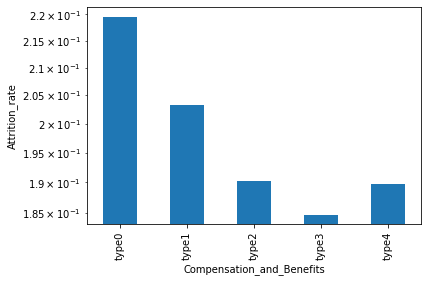

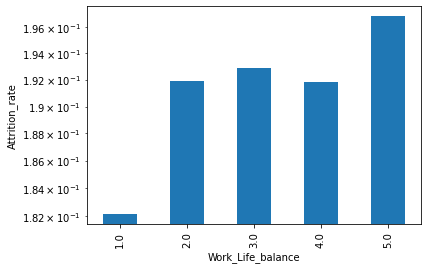

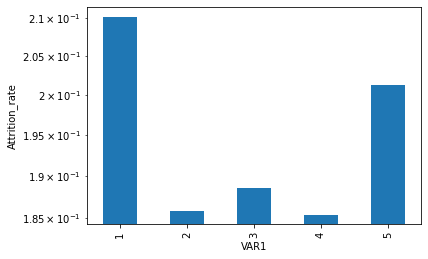

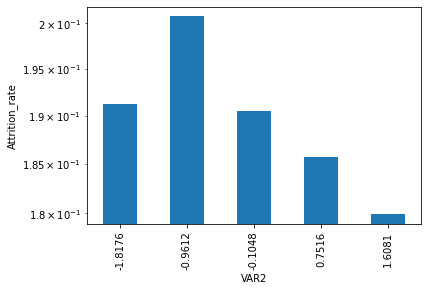

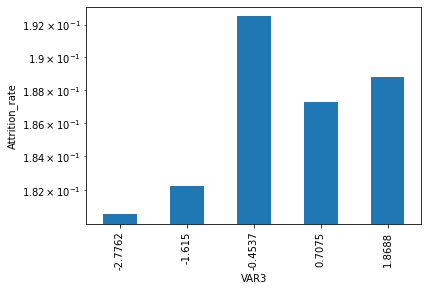

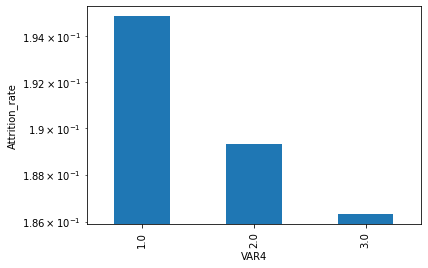

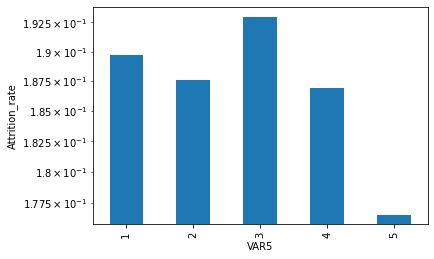

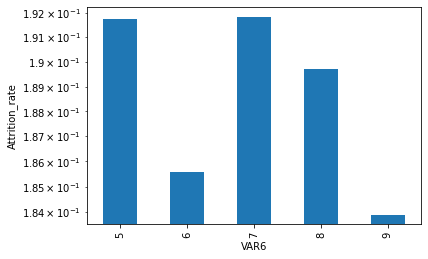

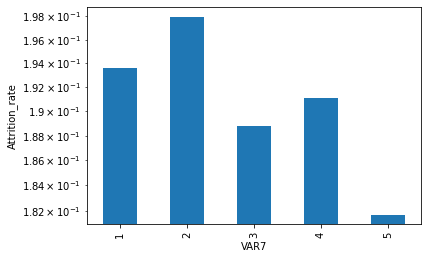

In [13]:
for feature in discrete_feature:
    df_train.groupby(feature)['Attrition_rate'].mean().plot.bar()
    plt.xlabel(feature)
    plt.yscale('log')
    plt.ylabel('Attrition_rate')
    
    plt.show()

In [14]:
#Using log transformation


In [15]:
continous_feature=[feature for feature in features_with_num if feature not in discrete_feature]
print(continous_feature)

['Age', 'Time_of_service', 'growth_rate', 'Pay_Scale', 'Attrition_rate']


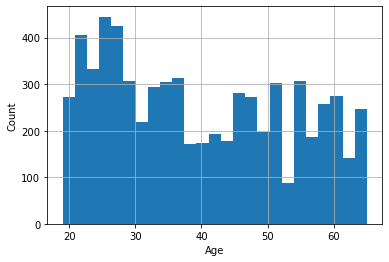

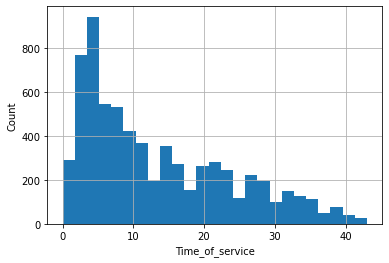

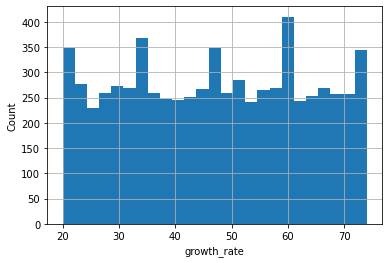

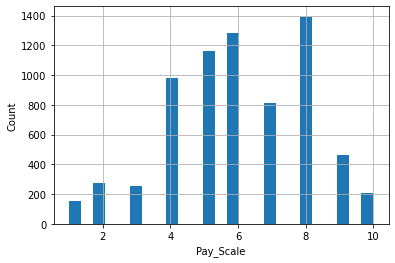

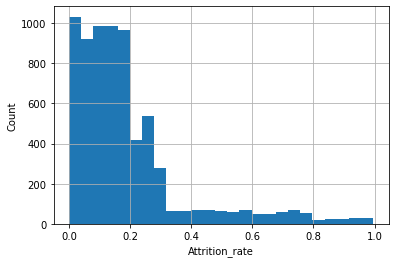

In [16]:
for feature in continous_feature:
    df_train[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

# Feature Engineering

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [18]:
mean_value=df_train[features_with_na].mean()
df_train.fillna(mean_value, inplace=True)

mean_value_test=df_test[features_with_na_test].mean()
df_test.fillna(mean_value_test, inplace=True)

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        7000 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            7000 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  7000 non-null   float

In [20]:
object_features=[feature for feature in df_train if df_train[feature].dtypes=='O']
object_features.remove('Employee_ID')
print(object_features)

object_features_test=[feature for feature in df_test if df_test[feature].dtypes=='O']
object_features_test.remove('Employee_ID')

['Gender', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess', 'Compensation_and_Benefits']


In [21]:
#Encoding categ features
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

for f in object_features:
   df_train[f]=encoder.fit_transform(df_train[f])


for f in object_features_test:
    df_test[f]=encoder.fit_transform(df_test[f])


In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   int64  
 2   Age                        7000 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   int64  
 5   Hometown                   7000 non-null   int64  
 6   Unit                       7000 non-null   int64  
 7   Decision_skill_possess     7000 non-null   int64  
 8   Time_of_service            7000 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  7000 non-null   float

In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                3000 non-null   object 
 1   Gender                     3000 non-null   int64  
 2   Age                        3000 non-null   float64
 3   Education_Level            3000 non-null   int64  
 4   Relationship_Status        3000 non-null   int64  
 5   Hometown                   3000 non-null   int64  
 6   Unit                       3000 non-null   int64  
 7   Decision_skill_possess     3000 non-null   int64  
 8   Time_of_service            3000 non-null   float64
 9   Time_since_promotion       3000 non-null   int64  
 10  growth_rate                3000 non-null   int64  
 11  Travel_Rate                3000 non-null   int64  
 12  Post_Level                 3000 non-null   int64  
 13  Pay_Scale                  3000 non-null   float

In [24]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [25]:
scale_feat= [f for f in df_train.columns if f not in ['Employee_ID','Attrition_rate']]
df_train[scale_feat]=scaler.fit_transform(df_train[scale_feat])

scale_feat_test=[f for f in df_test.columns if f not in ['Employee_ID','Attrition_rate']]
df_test[scale_feat_test]=scaler.fit_transform(df_test[scale_feat_test])

# MODEL FITTING

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

feat=['Gender', 'Age', 'Education_Level', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess','Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate','Post_Level', 'Pay_Scale', 'Compensation_and_Benefits','Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6','VAR7']
X=df_train[feat]
y=df_train.Attrition_rate

In [27]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.33, random_state=42) 


In [28]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

regressor=xgboost.XGBRegressor()

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [29]:
random_search=RandomizedSearchCV(regressor,param_distributions=params,n_iter=5,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    8.1s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validat

In [30]:
random_search.best_estimator_
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 3,
 'learning_rate': 0.25,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [31]:
new_model= xgboost.XGBRegressor(min_child_weight= 3,
 max_depth= 3,
 learning_rate=0.2,
 gamma= 0.4,
 colsample_bytree= 0.7)

In [32]:
new_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=3,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
y_pred=new_model.predict(X_test)

In [34]:
rmse=mean_squared_error(y_test, y_pred)**(1/2)

In [35]:
print(rmse)

0.19202612980017558


In [36]:
new_model.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=3,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
predictions=new_model.predict(df_test[feat])

In [38]:
output= pd.DataFrame({'Employee_ID': df_test.Employee_ID, 'Attrition_rate': predictions})
output.to_csv('MySubmission.csv', index=False)
print('Success')

Success
